In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as st
from IPython.display import Image
from matplotlib.ticker import FuncFormatter

In [71]:
def count_duplicated_rows(df):
    return df.duplicated().sum()

def count_nan_values(df):
    return df.isnull().sum()

def detect_outliers(df, column_name):
    """
    Detects outliers in a specified column of a dataframe using the IQR method.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to check for outliers.

    Returns:
    DataFrame: A dataframe containing the outliers.
    """
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers

def convert_to_millions(value_in_thousands):
    return value_in_thousands / 1000

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

In [5]:
bus_services_df = pd.read_csv('TOA16.20231203T111234.csv')

In [6]:
bus_services_df.head()

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0


In [46]:
bus_services_df.shape

(84, 5)

In [7]:
bus_services_size = bus_services_df.size
print(f'Total number of elements in the DataFrame: {bus_services_size}.')

Total number of elements in the DataFrame: 480.


In [8]:
bus_services_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     96 non-null     object 
 1   Year                96 non-null     int64  
 2   Scheduled services  96 non-null     object 
 3   UNIT                96 non-null     object 
 4   VALUE               84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ KB


In [9]:
bus_services_df.describe()

,Year,VALUE
count,96.000000,84.000000
mean,2016.500000,46097.047619
std,3.470174,36166.611880
min,2011.000000,7664.000000
25%,2013.750000,17977.750000
50%,2016.500000,41078.000000
75%,2019.250000,64506.500000
max,2022.000000,143104.000000


In [10]:
unique_statistic_labels = bus_services_df['Statistic Label'].unique()
unique_services = bus_services_df['Scheduled services'].unique()
unique_units = bus_services_df['UNIT'].unique()

unique_statistic_labels, unique_services, unique_units

(array(['Passengers', 'Vehicle kilometers'], dtype=object),
 array(['Dublin city services', 'Provincial city and town services',
        'Other scheduled services', 'School transport scheme'],
       dtype=object),
 array(['Number (000)', 'km (000)'], dtype=object))

Categorical Data Analysis:  
Statistic Labels: Two categories - 'Passengers' and 'Vehicle kilometers'.  
Scheduled Services: Four types - 'Dublin city services', 'Provincial city and town services', 'Other scheduled services', 'School transport scheme'.  
Units: Two units - 'Number (000)' and 'km (000)'.

Since the data includes multiple types of measurements - passengers and kilometers, it's important to handle these different units appropriately when analyzing and visualizing.

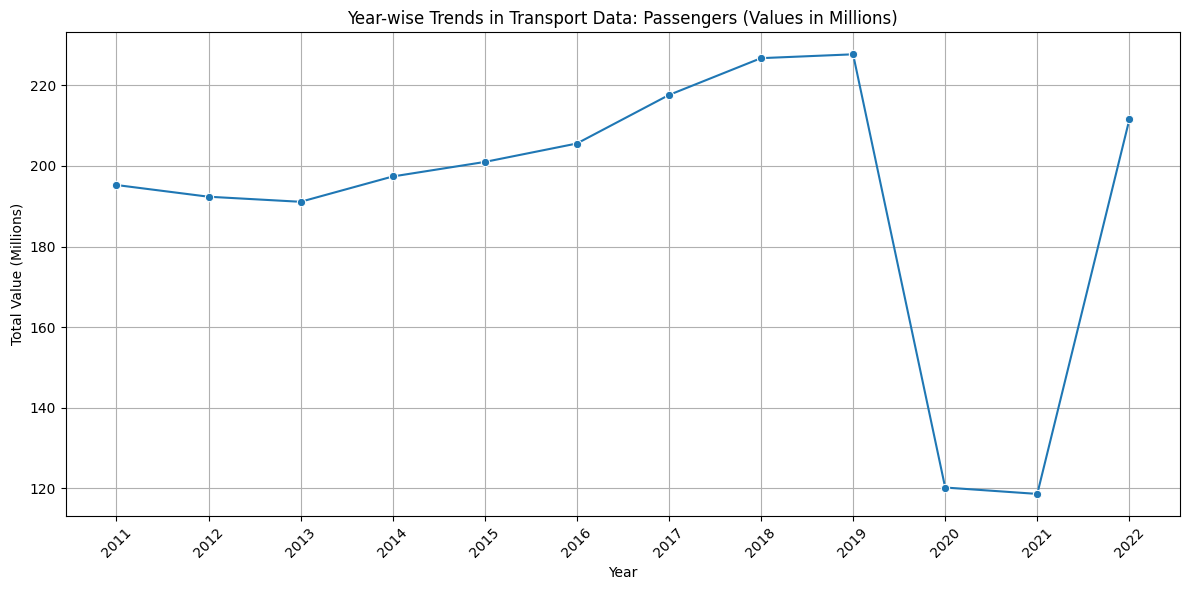

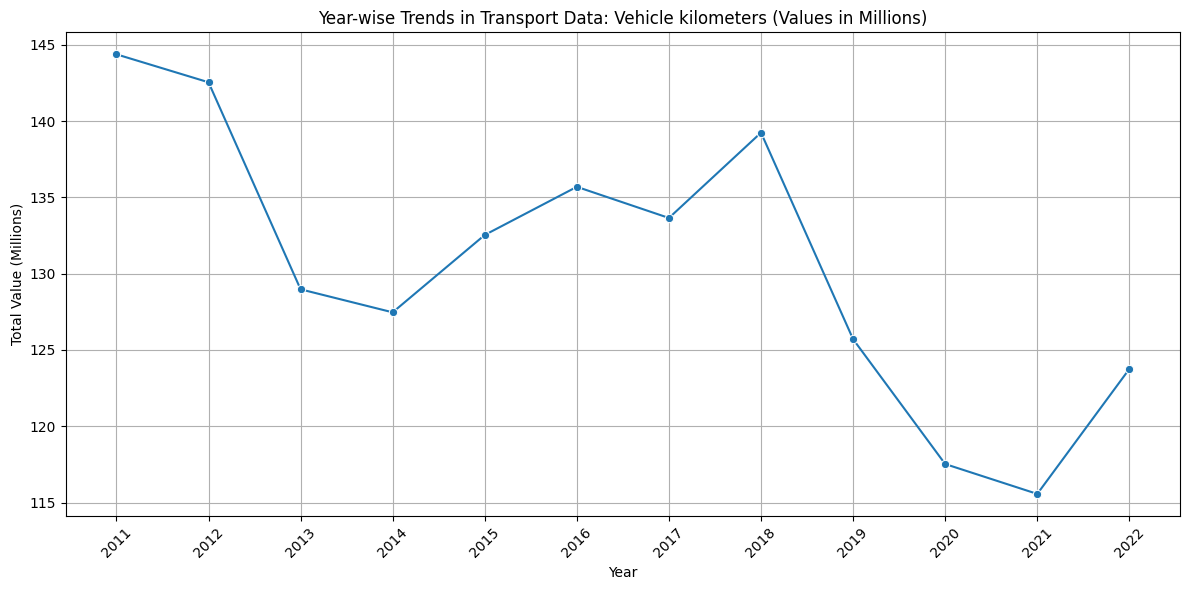

In [11]:
# Creating separate visualizations for each 'Statistic Label' after conversion of the VALUE column
for label in bus_services_df['Statistic Label'].unique():
    subset = bus_services_df[bus_services_df['Statistic Label'] == label]
    year_wise_data = subset.groupby('Year')['VALUE'].sum().apply(convert_to_millions)

    # Visualization of year-wise trends for each 'Statistic Label'
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=year_wise_data, marker='o')
    plt.title(f'Year-wise Trends in Transport Data: {label} (Values in Millions)')
    plt.ylabel('Total Value (Millions)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.xticks(year_wise_data.index, rotation=45)
    plt.tight_layout()
    plt.show()

Data Cleaning and checking for duplicates

In [39]:
print(f"Number of duplicate rows in the population dataset is {count_duplicated_rows(bus_services_df)}.")

Number of duplicate rows in the population dataset is 0.


In [36]:
count_nan_values(bus_services_df)

Statistic Label       0
Year                  0
Scheduled services    0
UNIT                  0
VALUE                 0
dtype: int64

In [14]:
missing_data_rows = bus_services_df[bus_services_df.isnull().any(axis=1)]

missing_data_rows

,Statistic Label,Year,Scheduled services,UNIT,VALUE
51,Vehicle kilometers,2011,School transport scheme,km (000),NaN
55,Vehicle kilometers,2012,School transport scheme,km (000),NaN
59,Vehicle kilometers,2013,School transport scheme,km (000),NaN
63,Vehicle kilometers,2014,School transport scheme,km (000),NaN
67,Vehicle kilometers,2015,School transport scheme,km (000),NaN
71,Vehicle kilometers,2016,School transport scheme,km (000),NaN
75,Vehicle kilometers,2017,School transport scheme,km (000),NaN
79,Vehicle kilometers,2018,School transport scheme,km (000),NaN
83,Vehicle kilometers,2019,School transport scheme,km (000),NaN
87,Vehicle kilometers,2020,School transport scheme,km (000),NaN


Observations:

Pattern of Missing Data: All missing values are in the 'VALUE' column for 'Vehicle kilometers' related to the 'School transport scheme'.
Consistency Across Years: This missing data is consistently observed across all years in the dataset for this particular category.

Choosing to exclude the rows with missing data is a valid approach, especially if the missing data pertains to a specific segment that is not central to your analysis, or if imputation could introduce significant bias or inaccuracies. In this case, since the missing values are all related to 'Vehicle kilometers' for the 'School transport scheme' across various years, excluding these rows should have a limited impact on analyses focusing on other aspects of the dataset.

In [15]:
bus_services_df = bus_services_df.dropna()

In [16]:
bus_services_df_info = bus_services_df.info()
bus_services_df_head = bus_services_df.head()

bus_services_df_info, bus_services_df_head

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 94
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Statistic Label     84 non-null     object 
 1   Year                84 non-null     int64  
 2   Scheduled services  84 non-null     object 
 3   UNIT                84 non-null     object 
 4   VALUE               84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.9+ KB


(None,
   Statistic Label  Year                 Scheduled services          UNIT  \
 0      Passengers  2011               Dublin city services  Number (000)   
 1      Passengers  2011  Provincial city and town services  Number (000)   
 2      Passengers  2011           Other scheduled services  Number (000)   
 3      Passengers  2011            School transport scheme  Number (000)   
 4      Passengers  2012               Dublin city services  Number (000)   
 
       VALUE  
 0  116958.0  
 1   16389.0  
 2   20112.0  
 3   41814.0  
 4  115198.0  )

Number of Entries: Reduced to 84 rows (from the original 96).  
Columns: Still consists of 5 columns - 'Statistic Label', 'Year', 'Scheduled services', 'UNIT', and 'VALUE'.  
Data Types: Remain the same, with no missing values in any column.

**Checking for outliers**

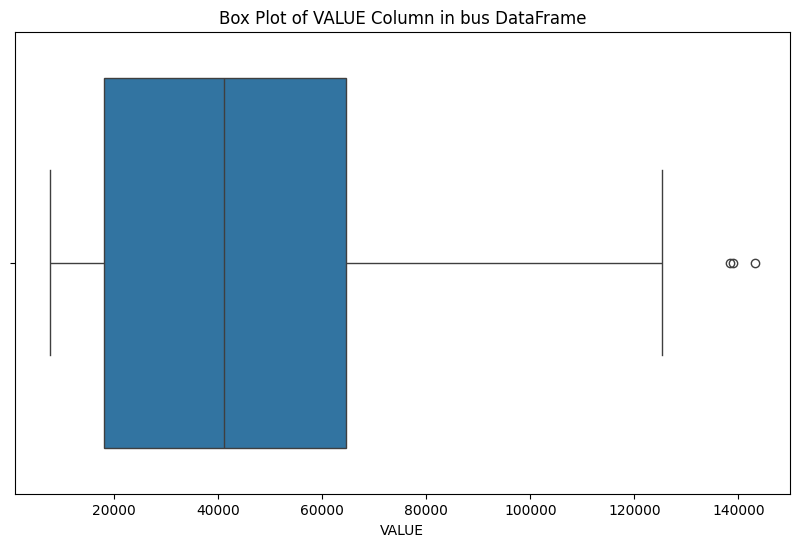

In [17]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=bus_services_df['VALUE'])

plt.title('Box Plot of VALUE Column in bus DataFrame')
plt.xlabel('VALUE')

# Show the plot
plt.show()


In [18]:
detect_outliers(bus_services_df,'VALUE')

,Statistic Label,Year,Scheduled services,UNIT,VALUE
24,Passengers,2017,Dublin city services,Number (000),138978.0
28,Passengers,2018,Dublin city services,Number (000),143104.0
32,Passengers,2019,Dublin city services,Number (000),138311.0


## **What do we do with the outliers**

Data segmentation involves dividing the dataset into meaningful subsets for more targeted analysis. The segmentation can be based on 'Statistic Label', 'Scheduled services', and 'UNIT'. This will allow us to analyze trends and patterns within each specific category and service type, providing more detailed and context-specific insights.

In [19]:
# Creating a dictionary to store segmented datasets
segmented_datasets = {}

for label in unique_statistic_labels:
    for service in unique_services:
        # Creating a subset for each combination of statistic label and service
        subset = bus_services_df[(bus_services_df['Statistic Label'] == label) & (bus_services_df['Scheduled services'] == service)]
        # Storing the subset in the dictionary if it's not empty
        if not subset.empty:
            segmented_datasets[f"{label}_{service}"] = subset

# Displaying the keys of the dictionary to show the created segments
segmented_datasets.keys()

dict_keys(['Passengers_Dublin city services', 'Passengers_Provincial city and town services', 'Passengers_Other scheduled services', 'Passengers_School transport scheme', 'Vehicle kilometers_Dublin city services', 'Vehicle kilometers_Provincial city and town services', 'Vehicle kilometers_Other scheduled services'])

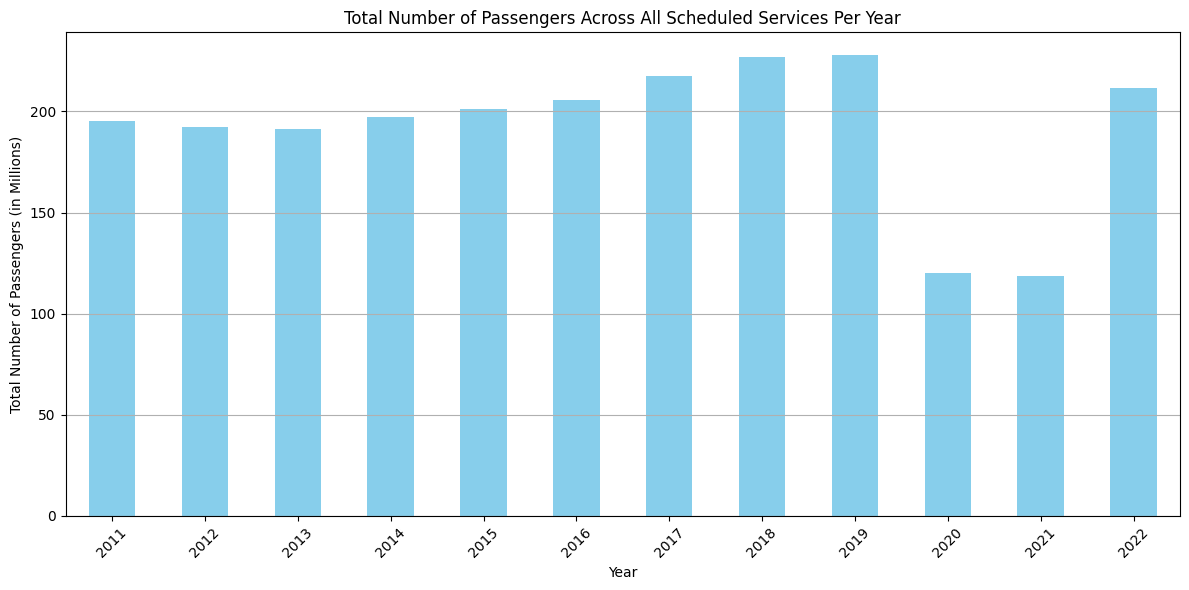

In [20]:
total_passengers_per_year = bus_services_df[bus_services_df['Statistic Label'] == 'Passengers'].groupby('Year')['VALUE'].sum().apply(convert_to_millions)

# Visualization using a bar chart
plt.figure(figsize=(12, 6))
total_passengers_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Number of Passengers Across All Scheduled Services Per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Passengers (in Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [21]:
total_passengers_per_year_millions = bus_services_df[bus_services_df['Statistic Label'] == 'Passengers'].groupby('Year')['VALUE'].sum().apply(convert_to_millions)

# Creating an interactive bar chart using Plotly
fig = px.bar(total_passengers_per_year_millions,
             x=total_passengers_per_year_millions.index,
             y=total_passengers_per_year_millions,
             labels={'y': 'Total Number of Passengers (Millions)', 'x': 'Year'},
             title='Total Number of Passengers Across All Scheduled Services Per Year (in Millions)')

fig.update_traces(hovertemplate='Year: %{x}<br>Number of Bus Passengers: %{y:.0f}M',
                  marker_color='skyblue', marker_line_color='blue',
                  marker_line_width=1.5, opacity=0.8)
fig.update_layout(
    showlegend=False,
    hovermode='x',
    xaxis_tickangle=-45,  
    xaxis=dict(
        tickmode='linear', 
        type='category'    
    )
)

fig.show()

## **Statistics - Confidence intervals**

In [22]:
passengers_number_df = bus_services_df[bus_services_df['UNIT'] == 'Number (000)']
passengers_number_df

,Statistic Label,Year,Scheduled services,UNIT,VALUE
0,Passengers,2011,Dublin city services,Number (000),116958.0
1,Passengers,2011,Provincial city and town services,Number (000),16389.0
2,Passengers,2011,Other scheduled services,Number (000),20112.0
3,Passengers,2011,School transport scheme,Number (000),41814.0
4,Passengers,2012,Dublin city services,Number (000),115198.0
5,Passengers,2012,Provincial city and town services,Number (000),16728.0
6,Passengers,2012,Other scheduled services,Number (000),20046.0
7,Passengers,2012,School transport scheme,Number (000),40398.0
8,Passengers,2013,Dublin city services,Number (000),114268.0
9,Passengers,2013,Provincial city and town services,Number (000),17651.0


In [23]:
service_counts = passengers_number_df[passengers_number_df['UNIT'] == 'Number (000)'].groupby('Scheduled services').count()

# Display the count of rows for each scheduled service
print(service_counts[['Statistic Label']])

                                   Statistic Label
Scheduled services                                
Dublin city services                            12
Other scheduled services                        12
Provincial city and town services               12
School transport scheme                         12


I want to know the average number of passengers for all bus services. I will use 95% confidence, meaning that the alpha will be 5%. I chose to use the 95% because it's the most popular as usually alpha is 5% as per standard.

In [24]:
#We define our x which will be the 'VALUE'

x = passengers_number_df.iloc[:,-1]
x

0     116958.0
1      16389.0
2      20112.0
3      41814.0
4     115198.0
5      16728.0
6      20046.0
7      40398.0
8     114268.0
9      17651.0
10     18076.0
11     41116.0
12    116262.0
13     18641.0
14     18547.0
15     43940.0
16    122093.0
17     19352.0
18     18509.0
19     41040.0
20    125377.0
21     20578.0
22     19108.0
23     40508.0
24    138978.0
25     20178.0
26     17683.0
27     40766.0
28    143104.0
29     22995.0
30     19070.0
31     41576.0
32    138311.0
33     26699.0
34     20074.0
35     42614.0
36     68927.0
37     13551.0
38      9017.0
39     28730.0
40     69929.0
41     10530.0
42      8152.0
43     30030.0
44    121378.0
45     28773.0
46     12677.0
47     48700.0
Name: VALUE, dtype: float64

In [25]:
# We create our confidence interval using Student's T. at 95% confidence

st.t.interval(confidence = 0.95, df = len(x) - 1, loc = np.mean(x), scale = st.sem(x))

(35695.47920716585, 60352.479126167476)

At a 95% confidence level, the passengers of all public bus services in Dublin per year is between 35695 (in thousands) and 60352 (in thousands) passengers.

In [26]:
passengers_number_df.describe()

,Year,VALUE
count,48.000000,48.000000
mean,2016.500000,48023.979167
std,3.488583,42457.937691
min,2011.000000,8152.000000
25%,2013.750000,18617.500000
50%,2016.500000,28751.500000
75%,2019.250000,53756.750000
max,2022.000000,143104.000000


Caluclate the same using the formulas for LL and UL

In [27]:
# We can calculate the LL and the UL with the formula

# 47 becaause we have 48 observations in total and n-1 = 47
# alpha is 0.025

LL = 48023.98 - (2.01 * 42457.94 / (47 ** 0.5))
UL = 48023.98 + (2.01 * 42457.94 / (47 ** 0.5))

LL, UL

(35575.794615192586, 60472.16538480742)

LL = mean - (x bar * std / n-1 ** 0.5)  
UL = mean + (x bar * std / n-1 ** 0.5)

https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/confidence-intervals

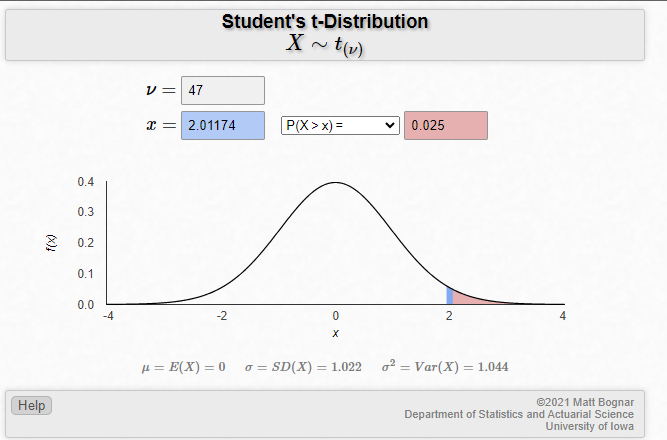

In [29]:
Image(filename='student\'s_t.png')

There is a slight different in the result because I took the ronded numbers from the decsriptive statistics, but it matches the confidence interval using Student's T. at 95% confidence

**FOCUS ON DUBLIN CITY SERVICES FOR NOW**

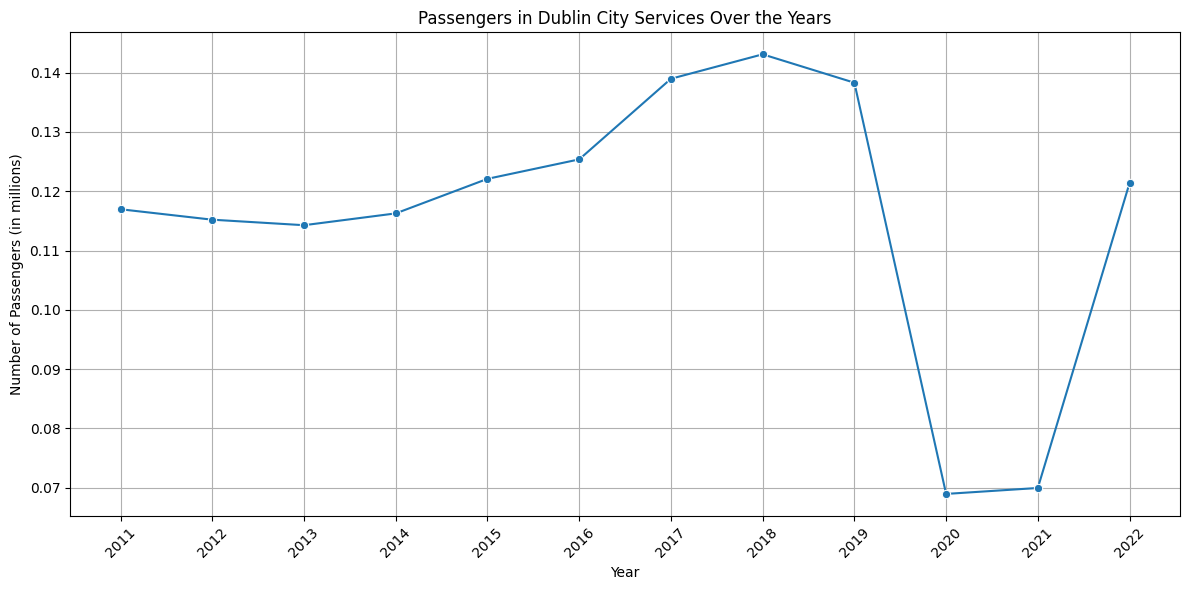

In [31]:
segment_1 = segmented_datasets['Passengers_Dublin city services']
segment_1.loc[:, 'VALUE'] = segment_1['VALUE'].apply(convert_to_millions)
# segment_1['VALUE'] = segment_1['VALUE'].apply(convert_to_millions) as I received the following warning using this line - A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead

# Visualization for "Passengers_Dublin city services"
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=segment_1, marker='o')
plt.title('Passengers in Dublin City Services Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in millions)')
plt.grid(True)
plt.xticks(segment_1['Year'].unique(), rotation=45)
plt.tight_layout()

plt.show()

We can see a huge decrease in number of passengers during COVID. Looking at post COVID data, still we see less passengers as comapred to before. Let's compare pre covid, covid and post covid.

## FIX FORMAT

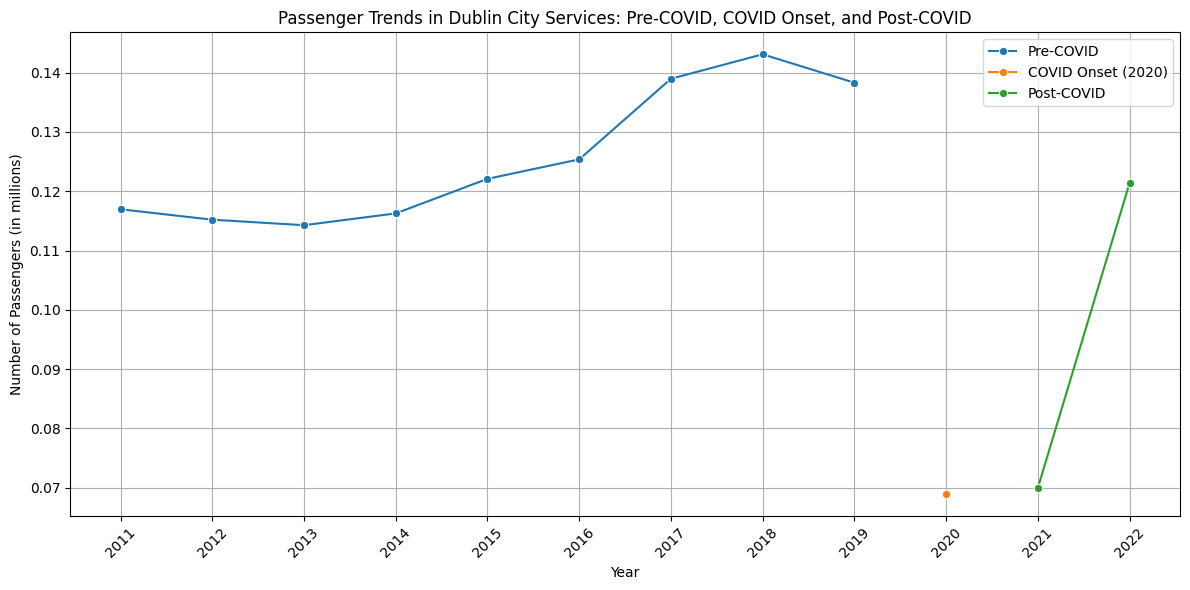

((0.12561655555555556, 0.068927, 0.0956535), None)

In [32]:
pre_covid_data = segment_1[segment_1['Year'] <= 2019]
post_covid_data = segment_1[segment_1['Year'] >= 2020]

# Calculating average passengers for each period
average_pre_covid = pre_covid_data['VALUE'].mean()
average_post_covid = post_covid_data['VALUE'].mean()


# Further segmenting the data for COVID-19 onset period
covid_onset_data = segment_1[segment_1['Year'] == 2020]
post_covid_data_revised = segment_1[segment_1['Year'] > 2020]

# Calculating average passengers for each period
average_pre_covid_revised = pre_covid_data['VALUE'].mean()
average_covid_onset = covid_onset_data['VALUE'].mean()
average_post_covid_revised = post_covid_data_revised['VALUE'].mean()

# Visualization to compare trends across different periods
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='VALUE', data=pre_covid_data, marker='o', label='Pre-COVID')
sns.lineplot(x='Year', y='VALUE', data=covid_onset_data, marker='o', label='COVID Onset (2020)')
sns.lineplot(x='Year', y='VALUE', data=post_covid_data_revised, marker='o', label='Post-COVID')
plt.title('Passenger Trends in Dublin City Services: Pre-COVID, COVID Onset, and Post-COVID')
plt.xlabel('Year')
plt.ylabel('Number of Passengers (in millions)')
plt.grid(True)
plt.xticks(segment_1['Year'].unique(), rotation=45)
plt.legend()
plt.tight_layout()

(average_pre_covid_revised, average_covid_onset, average_post_covid_revised), plt.show()


Average Number of Passengers:  
Pre-COVID-19 Period (up to 2019): Approximately 125,617 (in thousands).  
COVID-19 Onset Year (2020): Approximately 68,927 (in thousands).  
Post-COVID-19 Period (after 2020): Approximately 95,654 (in thousands).  

These trends highlight the challenges faced by the transport sector in recovering from the pandemic's impact.  
It suggests a need for strategies to boost public confidence and adapt to potentially changed commuting patterns in the post-pandemic world.

Is there a relationship between number of passengers and vehicle kilometers? There should be however number of passengers shouldn't be the only factor.

In [33]:
# Extracting the "Vehicle kilometers_Dublin city services" segment
segment_vehicle_km = segmented_datasets['Vehicle kilometers_Dublin city services']

# Merging the passengers and vehicle kilometers data on 'Year'
merged_data_dublin = pd.merge(segment_1, segment_vehicle_km, on='Year', suffixes=('_passengers', '_km'))

# Calculating the correlation coefficient
correlation = merged_data_dublin[['VALUE_passengers', 'VALUE_km']].corr()

correlation


,VALUE_passengers,VALUE_km
VALUE_passengers,1.000000,0.634004
VALUE_km,0.634004,1.000000


## **LUAS**

In [58]:
luas_passenger_df = pd.read_csv('TOA11.20231203T151248.csv')

In [59]:
luas_passenger_df.head()

,Statistic Label,Year,Month,UNIT,VALUE
0,Red line,2018,January,Number,1664495
1,Red line,2018,February,Number,1657562
2,Red line,2018,March,Number,1661098
3,Red line,2018,April,Number,1794424
4,Red line,2018,May,Number,1934553


In [60]:
luas_passenger_df.shape

(120, 5)

In [61]:
luas_passengers_size = luas_passenger_df.size
print(f'Total number of elements in the DataFrame: {luas_passengers_size}.')

Total number of elements in the DataFrame: 600.


In [62]:
luas_passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  120 non-null    object
 1   Year             120 non-null    int64 
 2   Month            120 non-null    object
 3   UNIT             120 non-null    object
 4   VALUE            120 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.8+ KB


In [63]:
luas_passenger_df.describe()

,Year,VALUE
count,120.000000,1.200000e+02
mean,2020.000000,1.395912e+06
std,1.420143,6.137619e+05
min,2018.000000,8.935800e+04
25%,2019.000000,8.437028e+05
50%,2020.000000,1.555940e+06
75%,2021.000000,1.912537e+06
max,2022.000000,2.277974e+06


**Checking for missing or duplicate data**

In [64]:
count_duplicated_rows(luas_passenger_df)

0

In [65]:
count_nan_values(luas_passenger_df)

Statistic Label    0
Year               0
Month              0
UNIT               0
VALUE              0
dtype: int64

In [66]:
detect_outliers(luas_passenger_df, 'VALUE')

,Statistic Label,Year,Month,UNIT,VALUE


We do not have any outliers

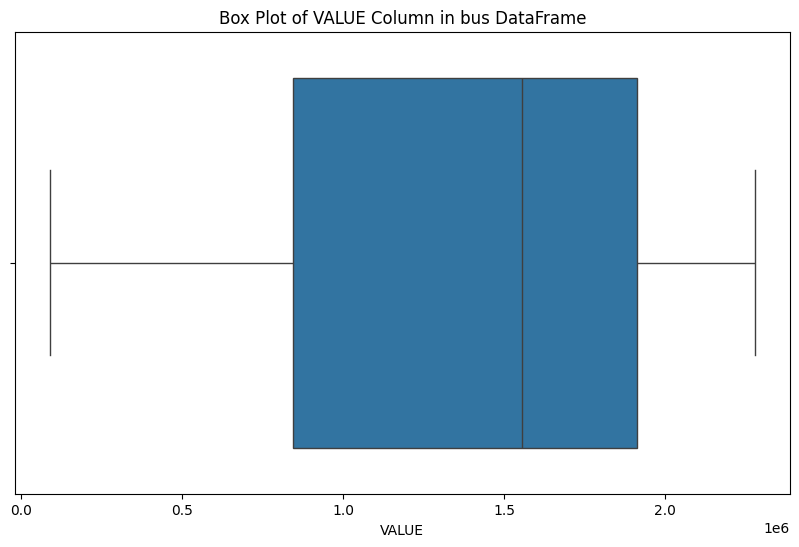

In [67]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=luas_passenger_df['VALUE'])

plt.title('Box Plot of VALUE Column in bus DataFrame')
plt.xlabel('VALUE')

# Show the plot
plt.show()

In [68]:
# Categorical Analysis: Distribution of 'Statistic Label'
label_distribution = luas_passenger_df['Statistic Label'].value_counts()
label_distribution

Statistic Label
Red line      60
Green line    60
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

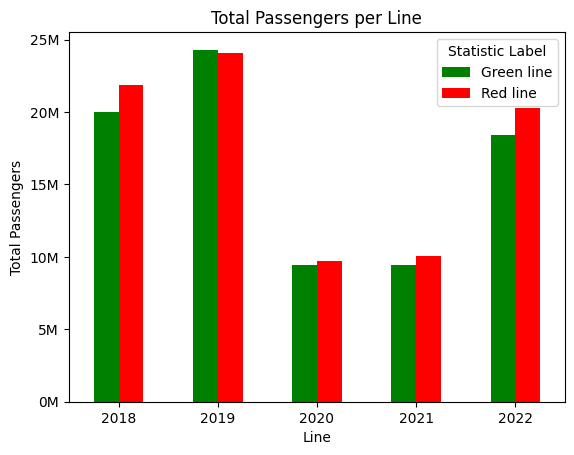

In [72]:
# Group data by 'Statistic' and calculate the sum of passengers for each line
line_passengers = luas_passenger_df.groupby(['Year', 'Statistic Label'])['VALUE'].sum().unstack()

# Create a bar chart
plt.figure(figsize=(12, 8))
ax = line_passengers.plot(kind='bar', color=['green', 'red'])
plt.title('Total Passengers per Line')
plt.xlabel('Line')
plt.ylabel('Total Passengers')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=0)
plt.show()

Same behaviour is present for the LUAS as well - during covid there is a huge increase in the passengers. We can see that the red line is usually having more passengers than the green one, with exception in 2019.

In [73]:
# Convert 'Month' to a numerical format
months = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
          "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}
luas_passenger_df['Month'] = luas_passenger_df['Month'].map(months)

# Create a 'Year-Month' column for more detailed trend analysis
luas_passenger_df['Year-Month'] = pd.to_datetime(luas_passenger_df[['Year', 'Month']].assign(DAY=1))

In [74]:
time_series_data = luas_passenger_df.groupby(['Year-Month', 'Statistic Label']).agg({'VALUE': 'sum'}).reset_index()

# Time Series Plot
fig_time_series_colored = px.line(time_series_data, x='Year-Month', y='VALUE', color='Statistic Label',
                                  title='Time Series Trend of Transport Usage',
                                  labels={'VALUE': 'Transport Usage', 'Year-Month': 'Date'},
                                  color_discrete_map={'Red line': 'red', 'Green line': 'green'})

# Preparing data for comparative bar chart
total_usage_per_line = luas_passenger_df.groupby('Statistic Label').agg({'VALUE': 'sum'}).reset_index()

# Comparative Bar Chart
fig_bar_chart_colored = px.bar(total_usage_per_line, x='Statistic Label', y='VALUE',
                               title='Total Transport Usage per Line',
                               labels={'VALUE': 'Total Transport Usage'},
                               color='Statistic Label',
                               color_discrete_map={'Red line': 'red', 'Green line': 'green'})

default_year = 2020
monthly_data_default_year = luas_passenger_df[luas_passenger_df['Year'] == default_year]

fig_monthly_trend_colored = px.bar(monthly_data_default_year, x='Month', y='VALUE', color='Statistic Label',
                                   title=f'Monthly Transport Usage for {default_year}',
                                   labels={'VALUE': 'Transport Usage', 'Month': 'Month'},
                                   color_discrete_map={'Red line': 'red', 'Green line': 'green'})

# Displaying the visualizations
fig_time_series_colored.show()
fig_bar_chart_colored.show()
fig_monthly_trend_colored.show()



In [75]:

# Assuming luas_passenger_df is your DataFrame

# Re-creating the time_series_data
time_series_data = luas_passenger_df.groupby(['Year-Month', 'Statistic Label']).agg({'VALUE': 'sum'}).reset_index()

# Time Series Plot with specific (softer) colors and formatted values
fig_time_series_colored = px.line(time_series_data, x='Year-Month', y='VALUE', color='Statistic Label',
                                  title='Time Series Trend of Transport Usage',
                                  labels={'VALUE': 'Transport Usage', 'Year-Month': 'Date'},
                                  color_discrete_map={'Red line': '#ff9999', 'Green line': '#99cc99'})
fig_time_series_colored.update_layout(yaxis_tickformat='0.1f')

# Preparing data for comparative bar chart
total_usage_per_line = luas_passenger_df.groupby('Statistic Label').agg({'VALUE': 'sum'}).reset_index()

# Comparative Bar Chart with specific (softer) colors and formatted values
fig_bar_chart_colored = px.bar(total_usage_per_line, x='Statistic Label', y='VALUE',
                               title='Total Transport Usage per Line',
                               labels={'VALUE': 'Total Transport Usage'},
                               color='Statistic Label',
                               color_discrete_map={'Red line': '#ff9999', 'Green line': '#99cc99'})
fig_bar_chart_colored.update_layout(yaxis_tickformat='0.1f')

# Selecting a default year for the monthly trend chart
default_year = 2020
monthly_data_default_year = luas_passenger_df[luas_passenger_df['Year'] == default_year]

# Monthly Trend Chart with specific (softer) colors and formatted values
fig_monthly_trend_colored = px.bar(monthly_data_default_year, x='Month', y='VALUE', color='Statistic Label',
                                   title=f'Monthly Transport Usage for {default_year}',
                                   labels={'VALUE': 'Transport Usage', 'Month': 'Month'},
                                   color_discrete_map={'Red line': '#ff9999', 'Green line': '#99cc99'})
fig_monthly_trend_colored.update_layout(yaxis_tickformat='0.1f')

# Displaying the visualizations
fig_time_series_colored.show()
fig_bar_chart_colored.show()
fig_monthly_trend_colored.show()


**Change colors, fix formatting and also figure out how to make the third one interactive as well because as of now I use a default year. 